## Bağlantı ve Yükleme İşlemleri

In [2]:
from google.colab import drive

In [3]:
drive.mount("/gdrive")

Mounted at /gdrive


In [4]:
%cd /gdrive

/gdrive


In [5]:
!ls "/gdrive/MyDrive/Calisma_ortami/veri.csv"

/gdrive/MyDrive/Calisma_ortami/veri.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [7]:
dataFrame= pd.read_csv("/gdrive/MyDrive/Calisma_ortami/veri.csv")

# Veriyi Anlama

In [8]:
dataFrame.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [10]:
df= dataFrame.drop("No", axis=1, inplace=True)
dataFrame.corr()

<ipython-input-10-bf3976ae97b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,Yas,Hacim,Maas
Yas,1.000000,0.364048,0.368277
Hacim,0.364048,1.000000,0.479024
Maas,0.368277,0.479024,1.000000


In [12]:
dataFrame.isnull().sum()

Cinsiyet    0
Yas         0
Hacim       0
Maas        0
dtype: int64

In [13]:
dataFrame.describe()

,Yas,Hacim,Maas
count,200.000000,200.000000,200.000000
mean,46.155000,53620.500000,5954.375000
std,17.492309,34855.146477,1777.210276
min,19.000000,0.000000,2600.000000
25%,30.000000,26575.000000,4550.000000
50%,47.000000,46400.000000,5775.000000
75%,63.000000,78225.000000,7431.250000
max,75.000000,143500.000000,10075.000000


<Axes: >

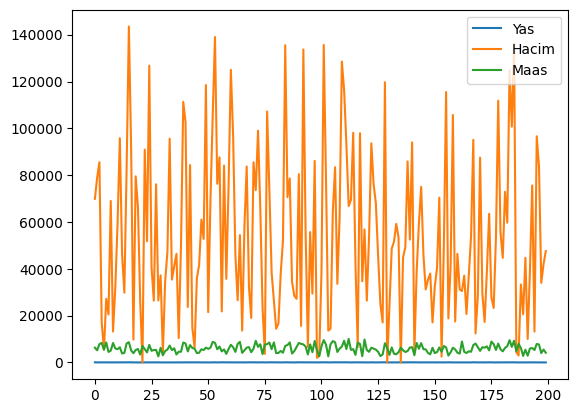

In [14]:
dataFrame.plot()

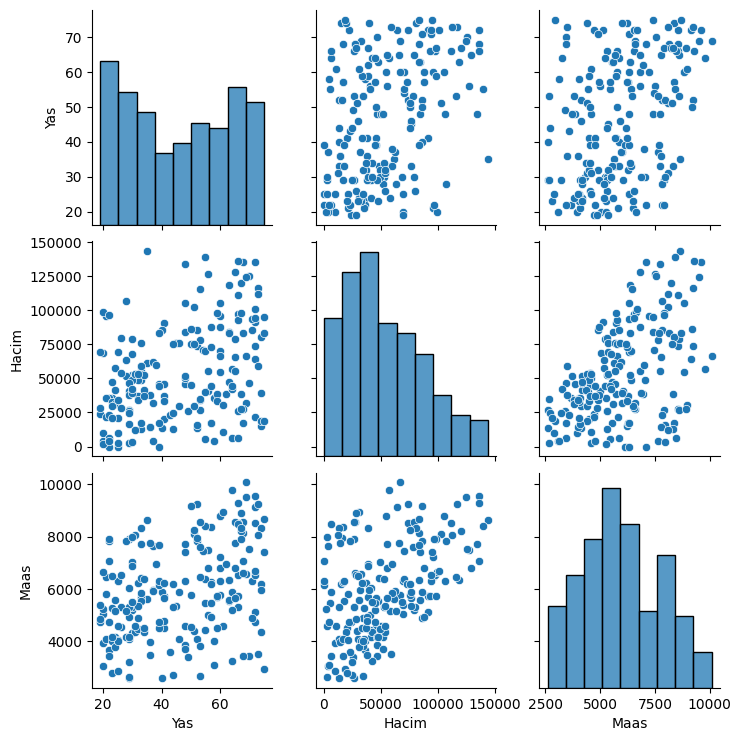

In [11]:
sbn.pairplot(dataFrame)

# Label Encoder

In [45]:
cinsiyet= dataFrame.iloc[:,0].values
type(cinsiyet)

numpy.ndarray

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le= LabelEncoder()

In [46]:
newcins = le.fit_transform(cinsiyet)
type(newcins)

numpy.ndarray

In [49]:
dataFrame["Cinsiyet"]= newcins
dataFrame.head()

,Cinsiyet,Yas,Hacim,Maas
0,1,60,69900,6325
1,1,30,79000,5200
2,0,52,85500,7825
3,0,57,17100,8375
4,0,55,5500,5450


# Veriyi Dikeyde Bölme

In [54]:
x= dataFrame.iloc[:,1:].values
y= dataFrame.iloc[:,0:1].values

# Veriyi Yatayda Bölme

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.33, random_state=0)

# Veriyi Ölçekleme

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler= StandardScaler()

In [60]:
x_train= scaler.fit_transform(x_train)

In [61]:
x_text= scaler.fit(x_test)

# K- Means Algorithm

In [150]:
from sklearn.cluster import KMeans

## WCSS
Cluster gruplarını belirlemek amaçlı tahmini olarak atılacak noktaların;   tahmini noktaların, noktalar etrafında bulunan datalara karesel uzaklığı baz alınarak en yakın noktalardan veri kümecikleriinin elde edilmesi yöntemidir.
Bu tahmini noktalar sürekli değişerek taki en uygun  veri kümecikleri oluşana kadar sürekli olarak yeni olauşan gruplara kare mesafeleri alınarak test edilir.
Bu noktalrın WCSS değerlerini `.inertia_` ile görebiliriz. Bu neticede oluşan grafilkten en uygun `n_clusters` değerini bulabiliriz. En iyi sonuç grafiktede görüleceği üzere dirsek noktası yani değişimin olduğu noktadır. `cluster_centers_` noktaların yerlerinin bulunduğu kod dizini.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

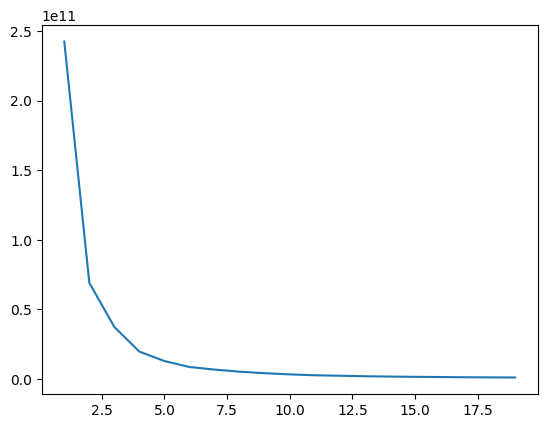

In [79]:
results = []
for i in range(1,20):
  kmeans= KMeans(n_clusters=i, init="k-means++")
  kmeans.fit(x)
  results.append(kmeans.inertia_)
plt.plot(range(1,20),results)

In [321]:
kmeans= KMeans(n_clusters= 4, init="k-means++", random_state=100)

In [322]:
kmeans.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=100)

In [323]:
y_pred= kmeans.predict(x_test)

Text(0.5, 1.0, 'KMeans')

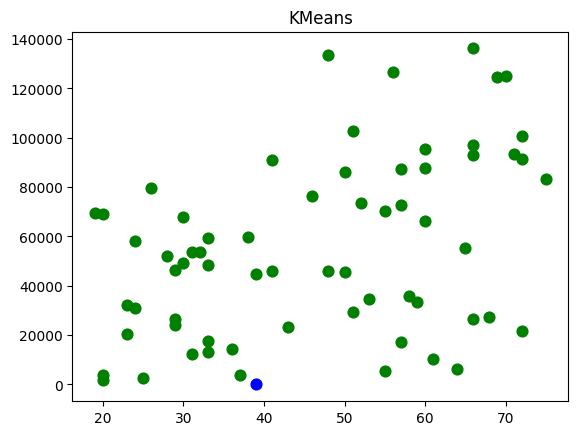

In [327]:
plt.scatter(x_test[y_pred==0,0], x_test[y_pred==0,1], s=60, c='blue')
plt.scatter(x_test[y_pred==1,0], x_test[y_pred==1,1], s=60, c='red')
plt.scatter(x_test[y_pred==2,0], x_test[y_pred==2,1], s=60, c='green')
plt.scatter(x_test[y_pred==3,0], x_test[y_pred==3,1], s=60, c='yellow')
plt.title("KMeans")

In [314]:
from sklearn.cluster import AgglomerativeClustering

In [328]:
ac= AgglomerativeClustering(n_clusters=4, affinity= "euclidean", linkage="ward")

In [329]:
ac.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [330]:
y_pred= ac.fit_predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'HC')

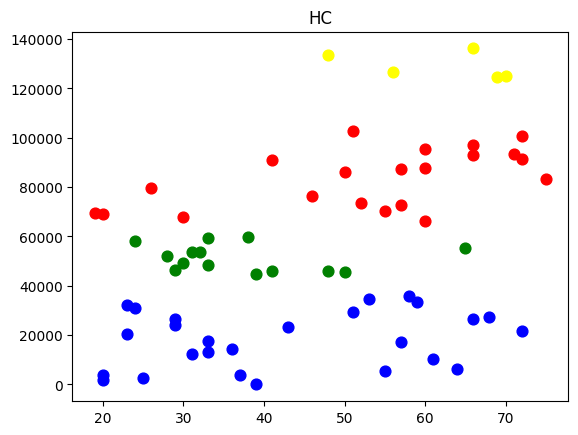

In [331]:
plt.scatter(x_test[y_pred==0,0], x_test[y_pred==0,1], s=60, c='blue')
plt.scatter(x_test[y_pred==1,0], x_test[y_pred==1,1], s=60, c='red')
plt.scatter(x_test[y_pred==2,0], x_test[y_pred==2,1], s=60, c='green')
plt.scatter(x_test[y_pred==3,0], x_test[y_pred==3,1], s=60, c='yellow')
plt.title("HC")

In [319]:
import scipy.cluster.hierarchy as sch

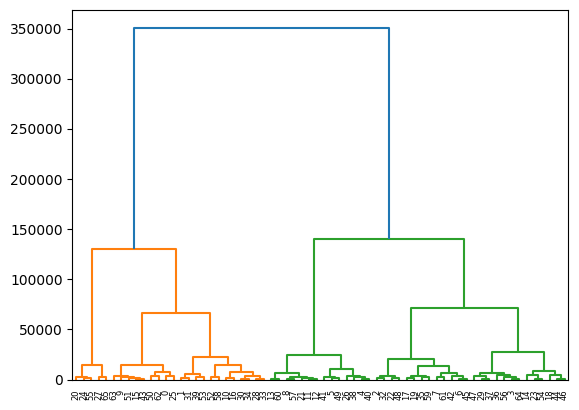

In [320]:
dendrogram= sch.dendrogram(sch.linkage(x_test,method="ward"))